<a href="https://colab.research.google.com/github/fahmidjobbi/TP-COLLAB/blob/main/Next_Word(s).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
data="""Artificial Intelligence (AI) is a technical science that studies and develops theories, methods, technologies, and applications for simulating and extending human intelligence. The purpose of AI is to enable machines to think like

people and to make machines intelligent. Today, AI has become an interdisciplinary course that involves various fields."""

In [2]:
corpus = data.lower().split('\n')
print(len(corpus))
print(type(corpus))
print(corpus[:2])

3
<class 'list'>
['artificial intelligence (ai) is a technical science that studies and develops theories, methods, technologies, and applications for simulating and extending human intelligence. the purpose of ai is to enable machines to think like', '']


In [3]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
total_unique_words = len(tokenizer.word_index) + 1 
print(total_unique_words)


40


In [4]:
print(word_index)

{'and': 1, 'ai': 2, 'to': 3, 'intelligence': 4, 'is': 5, 'that': 6, 'machines': 7, 'artificial': 8, 'a': 9, 'technical': 10, 'science': 11, 'studies': 12, 'develops': 13, 'theories': 14, 'methods': 15, 'technologies': 16, 'applications': 17, 'for': 18, 'simulating': 19, 'extending': 20, 'human': 21, 'the': 22, 'purpose': 23, 'of': 24, 'enable': 25, 'think': 26, 'like': 27, 'people': 28, 'make': 29, 'intelligent': 30, 'today': 31, 'has': 32, 'become': 33, 'an': 34, 'interdisciplinary': 35, 'course': 36, 'involves': 37, 'various': 38, 'fields': 39}


In [5]:
for line in corpus:
   seqs = tokenizer.texts_to_sequences([line])[0]
print(seqs)

[28, 1, 3, 29, 7, 30, 31, 2, 32, 33, 34, 35, 36, 6, 37, 38, 39]


In [6]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)): 
    n_gram_seqs = token_list[:i+1]
    input_sequences.append(n_gram_seqs)
print(len(input_sequences))
print(input_sequences)

48
[[8, 4], [8, 4, 2], [8, 4, 2, 5], [8, 4, 2, 5, 9], [8, 4, 2, 5, 9, 10], [8, 4, 2, 5, 9, 10, 11], [8, 4, 2, 5, 9, 10, 11, 6], [8, 4, 2, 5, 9, 10, 11, 6, 12], [8, 4, 2, 5, 9, 10, 11, 6, 12, 1], [8, 4, 2, 5, 9, 10, 11, 6, 12, 1, 13], [8, 4, 2, 5, 9, 10, 11, 6, 12, 1, 13, 14], [8, 4, 2, 5, 9, 10, 11, 6, 12, 1, 13, 14, 15], [8, 4, 2, 5, 9, 10, 11, 6, 12, 1, 13, 14, 15, 16], [8, 4, 2, 5, 9, 10, 11, 6, 12, 1, 13, 14, 15, 16, 1], [8, 4, 2, 5, 9, 10, 11, 6, 12, 1, 13, 14, 15, 16, 1, 17], [8, 4, 2, 5, 9, 10, 11, 6, 12, 1, 13, 14, 15, 16, 1, 17, 18], [8, 4, 2, 5, 9, 10, 11, 6, 12, 1, 13, 14, 15, 16, 1, 17, 18, 19], [8, 4, 2, 5, 9, 10, 11, 6, 12, 1, 13, 14, 15, 16, 1, 17, 18, 19, 1], [8, 4, 2, 5, 9, 10, 11, 6, 12, 1, 13, 14, 15, 16, 1, 17, 18, 19, 1, 20], [8, 4, 2, 5, 9, 10, 11, 6, 12, 1, 13, 14, 15, 16, 1, 17, 18, 19, 1, 20, 21], [8, 4, 2, 5, 9, 10, 11, 6, 12, 1, 13, 14, 15, 16, 1, 17, 18, 19, 1, 20, 21, 4], [8, 4, 2, 5, 9, 10, 11, 6, 12, 1, 13, 14, 15, 16, 1, 17, 18, 19, 1, 20, 21, 4, 22], [8

In [ ]:
pip install tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for tf: filename=tf-1.0.0-py3-none-any.whl size=1285 sha256=4f2a320e83d15575bdbfc187887fdece601e9ce284a67f0f0635e3f367f66352
  Stored in directory: /root/.cache/pip/wheels/db/c7/58/cca67875b41ff853d3fdaa20b54a780ef2e045fbcacaef1ee3
Successfully built tf


In [7]:
import csv
import nltk
import string
import pandas as pd
import numpy as np
from google.colab import drive
from keras import backend as K
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam


In [8]:
max_seq_length = max([len(x) for x in input_sequences])
input_seqs = np.array(pad_sequences(input_sequences, maxlen=max_seq_length, padding='pre'))
print(max_seq_length)
print(input_seqs[:5])

33
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  8  4]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  8  4  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  8  4  2  5]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  8  4  2  5  9]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  8  4  2  5  9 10]]


In [9]:
from tensorflow.keras.utils import to_categorical
x_values, labels = input_seqs[:, :-1], input_seqs[:, -1]
y_values = to_categorical(labels, num_classes=total_unique_words)
print(x_values[:3])
print(labels[:3])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 4]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 4 2]]
[4 2 5]


In [10]:
print(tokenizer.word_index['ai'])
print(tokenizer.word_index['intelligence'])
embeddings_matrix = np.zeros((total_unique_words, 100))

2
4


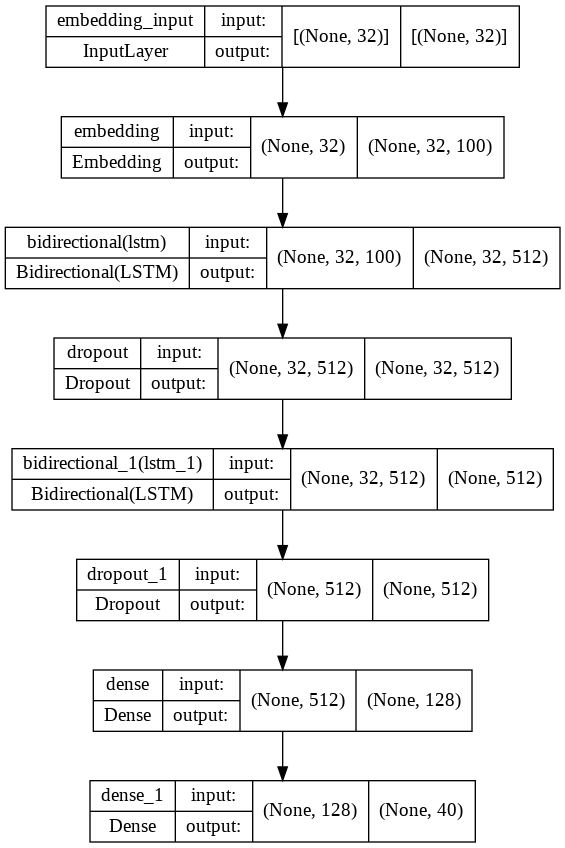

In [11]:
K.clear_session()
model = tf.keras.Sequential([
tf.keras.layers.Embedding(input_dim = total_unique_words, 
output_dim=100, weights=[embeddings_matrix], 
input_length=max_seq_length-1, trainable=False),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, 
return_sequences=True)),
tf.keras.layers.Dropout(0.2), 
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256)),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(total_unique_words , activation='softmax')])
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', metrics=['accuracy'])
tf.keras.utils.plot_model(model, show_shapes=True)

In [12]:
history = model.fit(x_values, y_values, epochs=120, 
                    validation_split=0.2, verbose=1, batch_size=256)

Epoch 1/120
1/1 [==============================] - 11s 11s/step - loss: 3.6889 - accuracy: 0.0000e+00 - val_loss: 3.6899 - val_accuracy: 0.0000e+00
Epoch 2/120
1/1 [==============================] - 1s 942ms/step - loss: 3.6883 - accuracy: 0.1053 - val_loss: 3.6910 - val_accuracy: 0.0000e+00
Epoch 3/120
1/1 [==============================] - 1s 902ms/step - loss: 3.6878 - accuracy: 0.1053 - val_loss: 3.6920 - val_accuracy: 0.0000e+00
Epoch 4/120
1/1 [==============================] - 1s 924ms/step - loss: 3.6872 - accuracy: 0.1053 - val_loss: 3.6931 - val_accuracy: 0.0000e+00
Epoch 5/120
1/1 [==============================] - 1s 894ms/step - loss: 3.6867 - accuracy: 0.1053 - val_loss: 3.6941 - val_accuracy: 0.0000e+00
Epoch 6/120
1/1 [==============================] - 1s 893ms/step - loss: 3.6861 - accuracy: 0.1053 - val_loss: 3.6952 - val_accuracy: 0.0000e+00
Epoch 7/120
1/1 [==============================] - 1s 947ms/step - loss: 3.6856 - accuracy: 0.1053 - val_loss: 3.6962 - val_acc

In [13]:
def prediction(seed_text, next_words): 
  for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')  
    predicted = np.argmax(model.predict(token_list, verbose=1), axis=-1)  
    ouput_word = ""  
    for word, index in tokenizer.word_index.items():
      if index == predicted:
        output_word = word
        break
    seed_text += ' '+output_word
    print(seed_text)


In [14]:
seed_text = "Artificial Intelligence  "
next_words = len("Artificial Intelligence (AI) ".split())
prediction(seed_text, next_words)

1/1 [==============================] - 2s 2s/step
Artificial Intelligence   and
1/1 [==============================] - 0s 36ms/step
Artificial Intelligence   and and
1/1 [==============================] - 0s 37ms/step
Artificial Intelligence   and and and
